# `ggplot2`之标度`scale`相关语法
**ggplot2**中的`scales`语法

**ggplot2**图层语法框架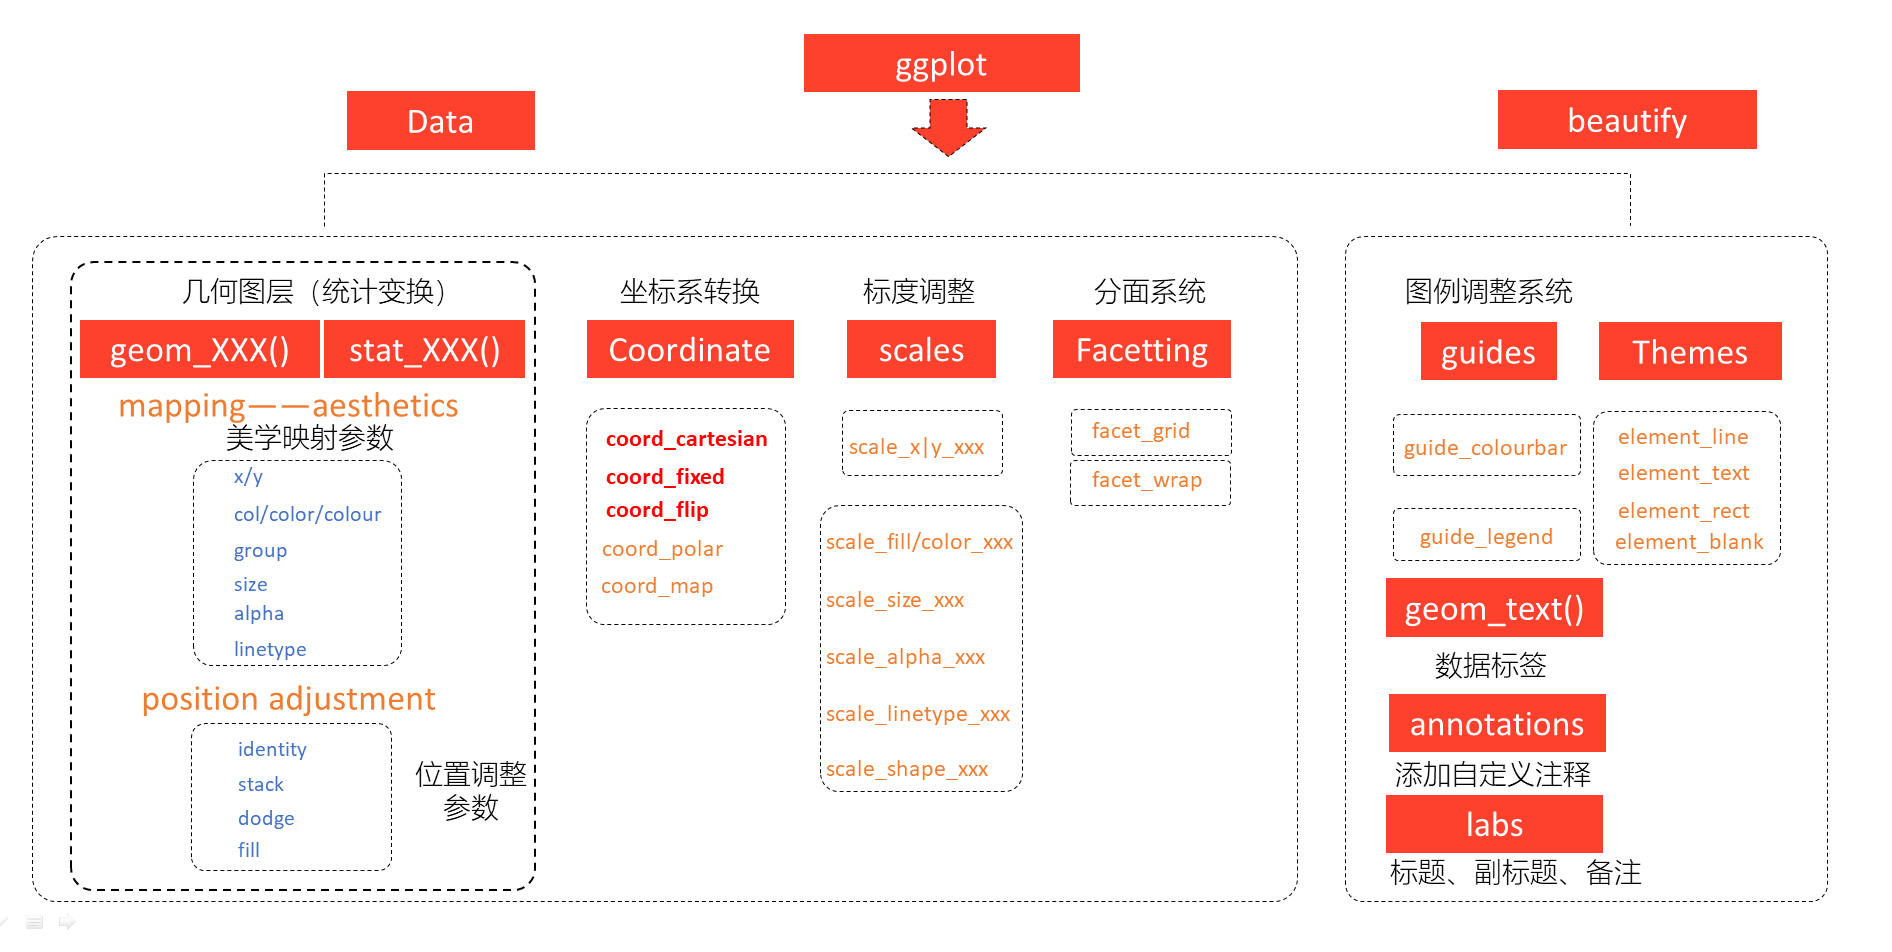

## 标度
`ggplot2`中，映射是数据转化到图形属性，这里的图形属性是指视觉可以感知的东西，比如大小，形状，颜色和位置等。标度（`scale`）是控制着数据到图形属性映射的函数，每一种标度都是从数据空间的某个区域（标度的定义域）到图形属性空间的某个区域（标度的值域）的一个函数。

简单点来说，**标度是用于调整数据映射的图形属性**。 在`ggplot2`中，每一种图形属性都拥有一个默认的标度，也许你对这个默认的标度不满意，可以就需要学习如何修改默认的标度。比如， 系统默认`"a"`对应红色，`"b"`对应蓝色，我们想让`"a"`对应紫色，`"b"`对应橙色。

## 图形属性和变量类型
还是用我们熟悉的`ggplot2::mpg`

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


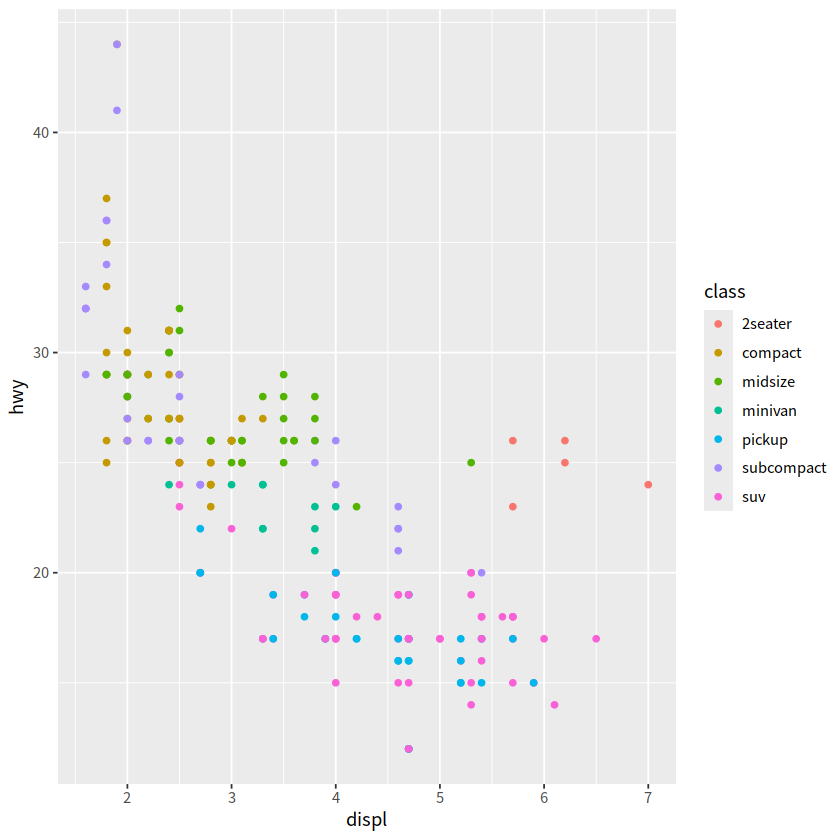

In [4]:
ggplot2::mpg %>% 
  ggplot(aes(x = displ, y = hwy))+
  geom_point(aes(color = class))

事实上，根据映射关系和变量名，我们将标度写完整，应该是这样的

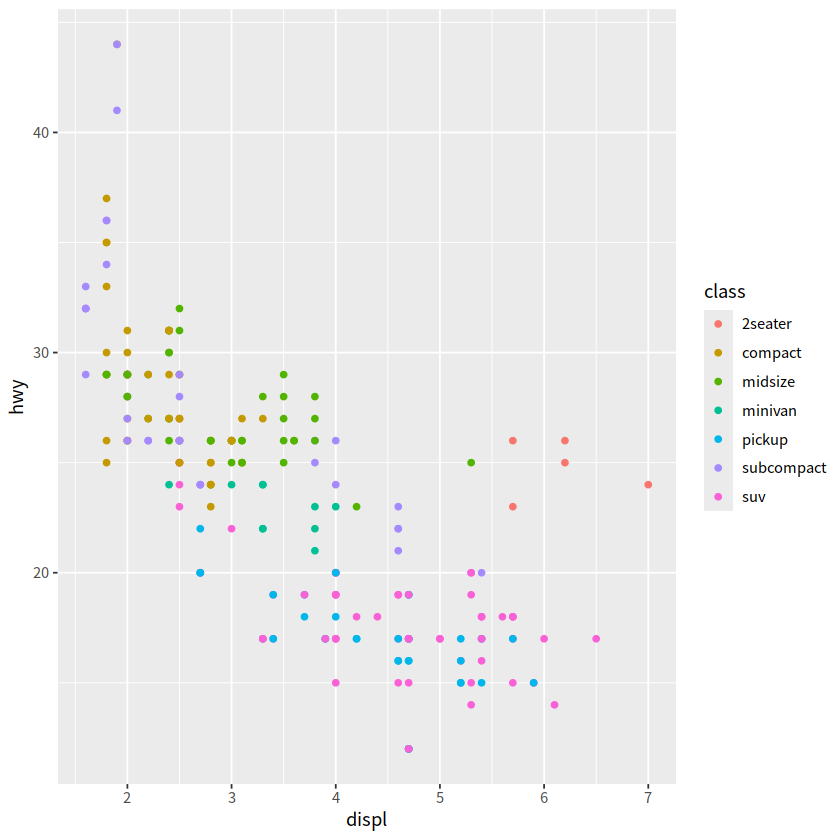

In [5]:
ggplot(mpg, aes(x = displ, y = hwy))+
  geom_point(aes(color = class))+

  scale_x_continuous()+
  scale_y_continuous()+
  scale_color_discrete()

如果每次都要手动设置一次标度函数，那将是比较繁琐的事情。因此`ggplot2`使用了默认了设置，如果不满意`ggplot2`的默认值，可以手动调整或者改写标度

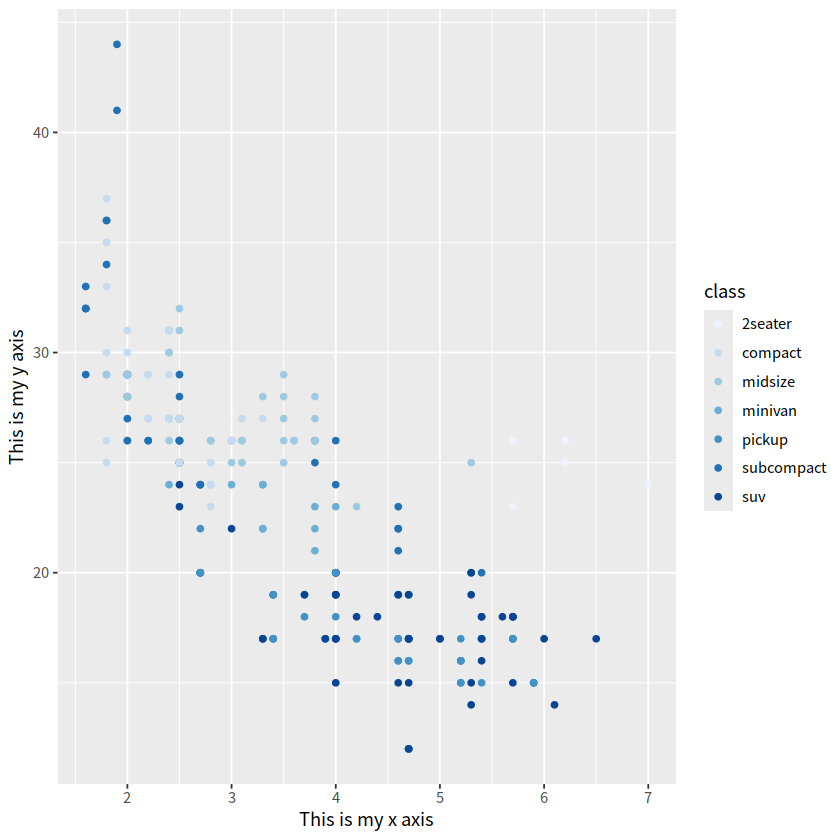

In [6]:
ggplot(mpg, aes(x = displ, y = hwy))+
  geom_point(aes(color = class))+
  
  scale_x_continuous(name = "This is my x axis")+
  scale_y_continuous(name = "This is my y axis")+
  scale_color_brewer()

## 坐标轴和图例是同样的东西
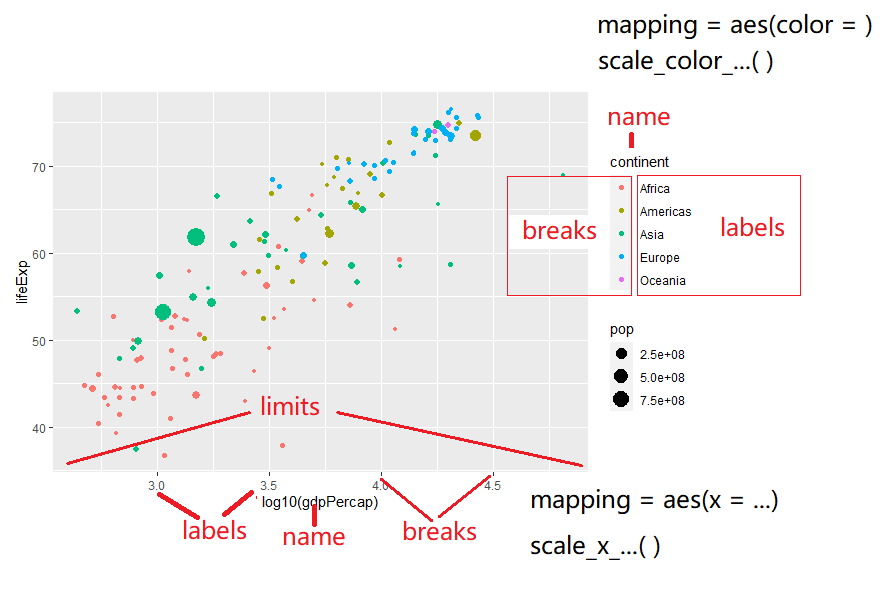

## 丰富的标度体系
注意到，标度函数是由”`_`“分割的三个部分构成的 - `scale` - 视觉属性名 (e.g., `colour`, `shape` or `x`) - 标度名 (e.g., `continuous`, `discrete`, `brewer`).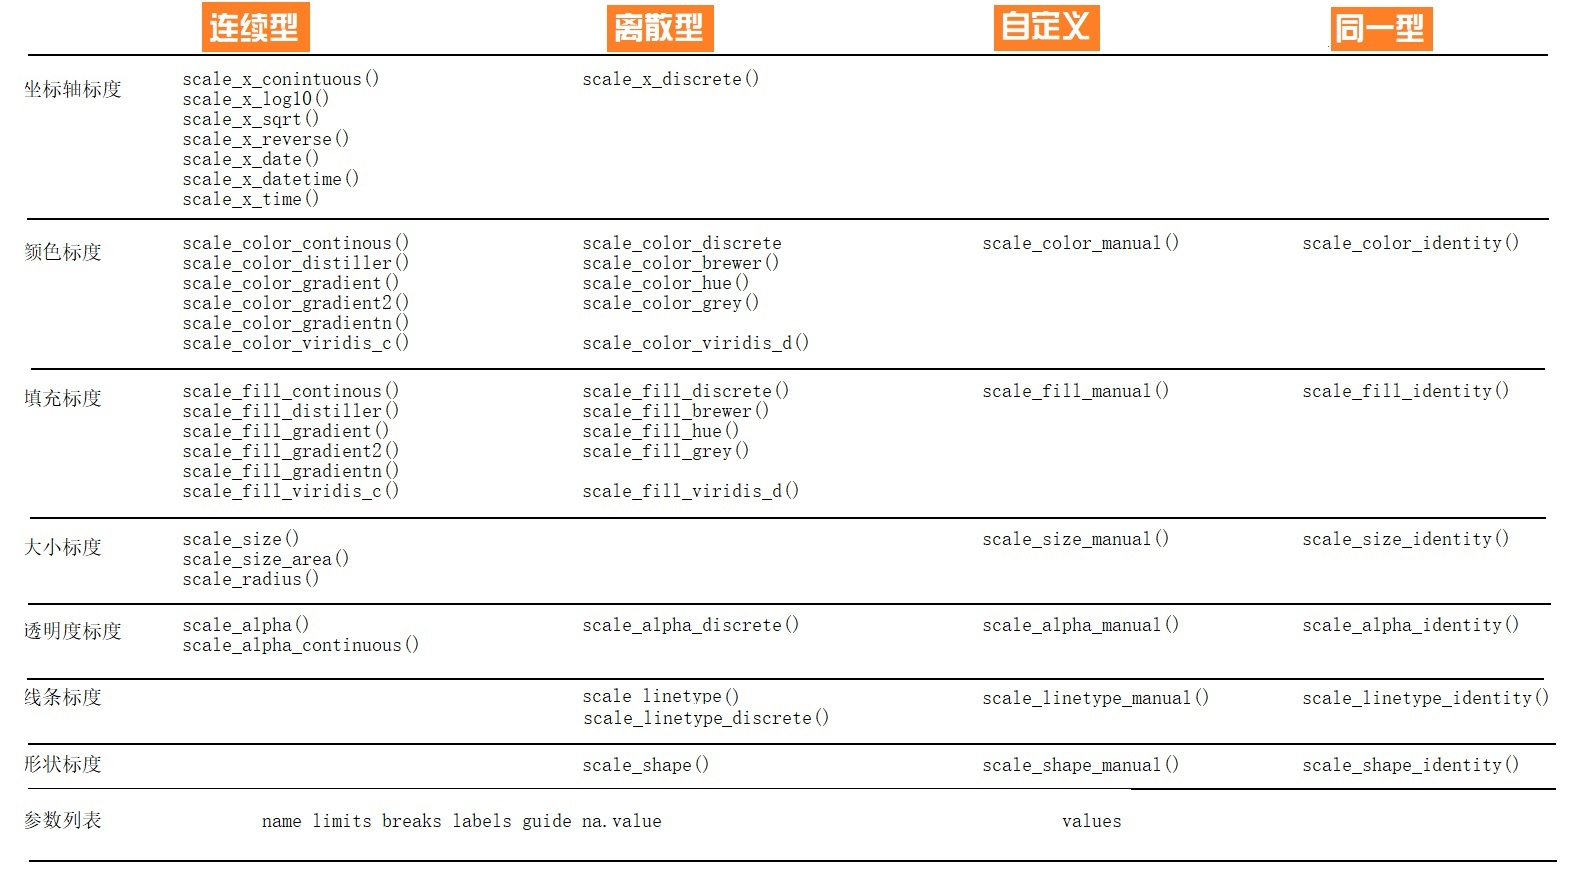

每个标度函数内部都有丰富的参数系统

In [ ]:
scale_colour_manual(
  palette = function(), 
  limits = NULL,
  name = waiver(),
  labels = waiver(),
  breaks = waiver(),
  minor_breaks = waiver(),
  values = waiver(),
  ...
)

- 参数`name`，坐标和图例的名字，如果不想要图例的名字，就可以 `name = NULL`

- 参数`limits`, 坐标或图例的范围区间。连续性`c(n, m)`，离散型`c("a", "b", "c")`

- 参数`breaks`, 控制显示在坐标轴或者图例上的值（元素）

- 参数`labels`, 坐标和图例的间隔标签

  - 一般情况下，内置函数会自动完成
  - 也可人工指定一个字符型向量，与`breaks`提供的字符型向量一一对应
  - 也可以是函数，把`breaks`提供的字符型向量当做函数的输入
  - `NULL`，就是去掉标签
- 参数`values` 指的是（颜色、形状等）视觉属性值,

  - 要么，与数值的顺序一致；
  - 要么，与`breaks`提供的字符型向量长度一致
  - 要么，用命名向量`c("数据标签" = "视觉属性")`提供
- 参数`expand`, 控制参数溢出量

- 参数`range`, 设置尺寸大小范围，比如针对点的相对大小

## 案例详解

In [7]:
gapdata <- read_csv("./demo_data/gapminder.csv")

Rows: 1704 Columns: 6
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): country, continent
dbl (4): year, lifeExp, pop, gdpPercap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
newgapdata <- gapdata %>% 
  group_by(continent, country) %>% 
  summarise(
    across(c(lifeExp, gdpPercap, pop), mean)
  )
newgapdata %>% head()

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


continent,country,lifeExp,gdpPercap,pop
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Africa,Algeria,59.03017,4426.0260,19875406.2
Africa,Angola,37.88350,3607.1005,7309390.1
Africa,Benin,48.77992,1155.3951,4017496.7
Africa,Botswana,54.59750,5031.5036,971186.2
Africa,Burkina Faso,44.69400,843.9907,7548677.2
Africa,Burundi,44.81733,471.6630,4651608.3


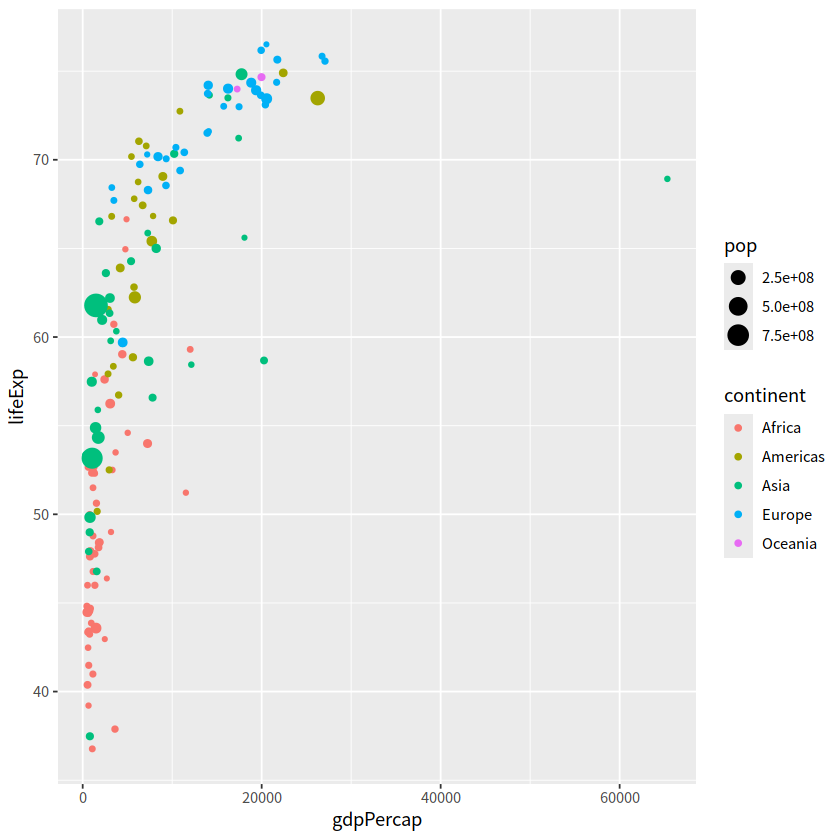

In [9]:
newgapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point(aes(color = continent, size = pop))+
  scale_x_continuous()

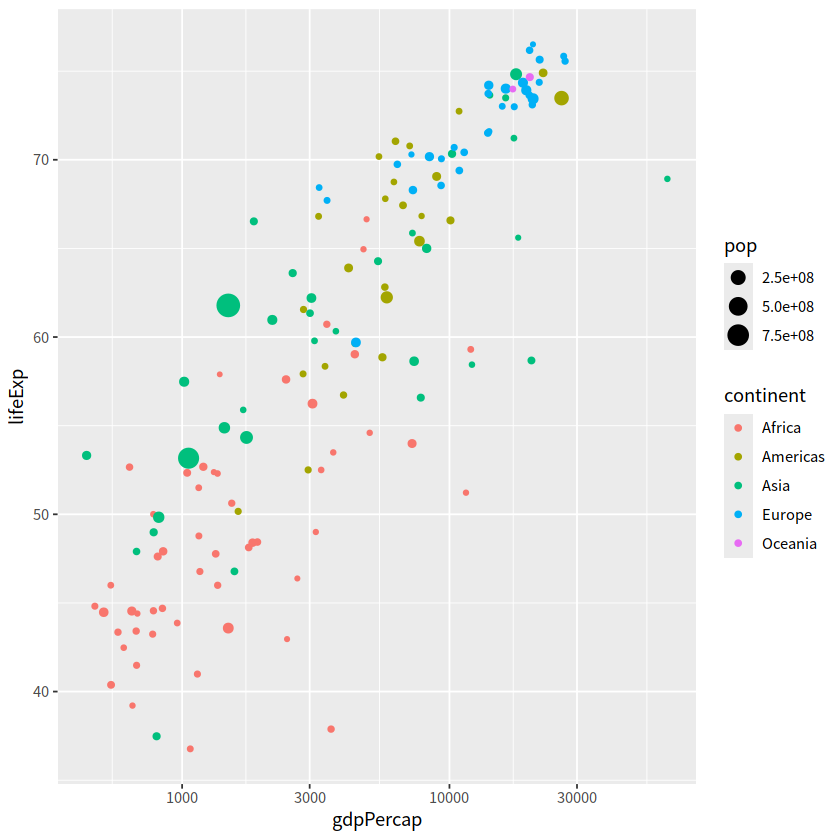

In [10]:
newgapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
    geom_point(aes(color = continent, size = pop))+
    scale_x_log10()

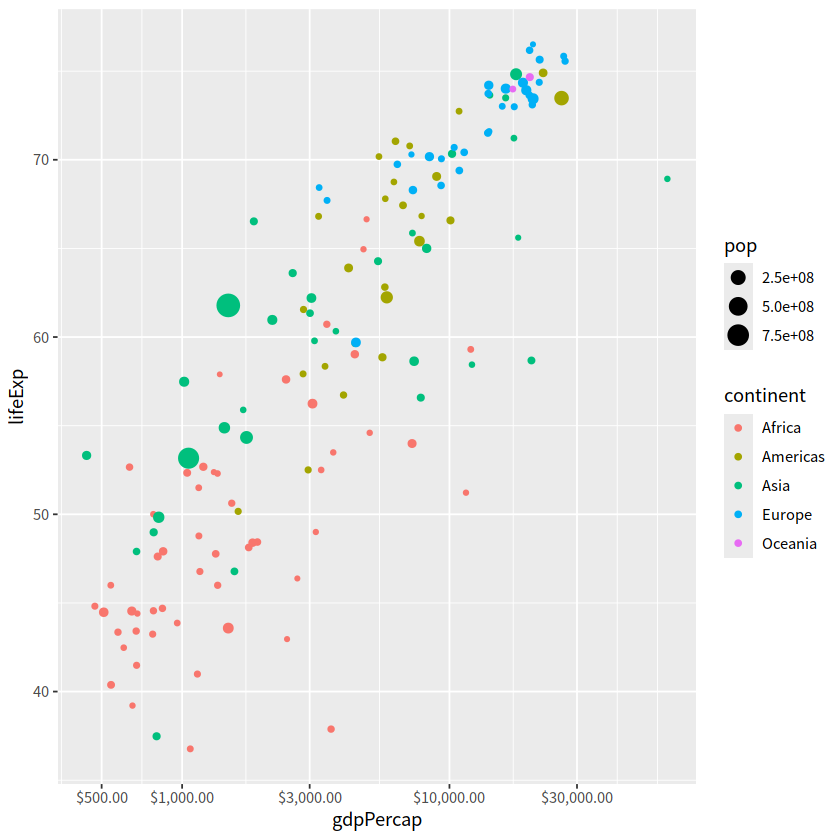

In [11]:
newgapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
    geom_point(aes(color = continent, size = pop))+
    scale_x_log10(breaks = c(500, 1000, 3000, 10000, 30000),
                  labels = scales::dollar)

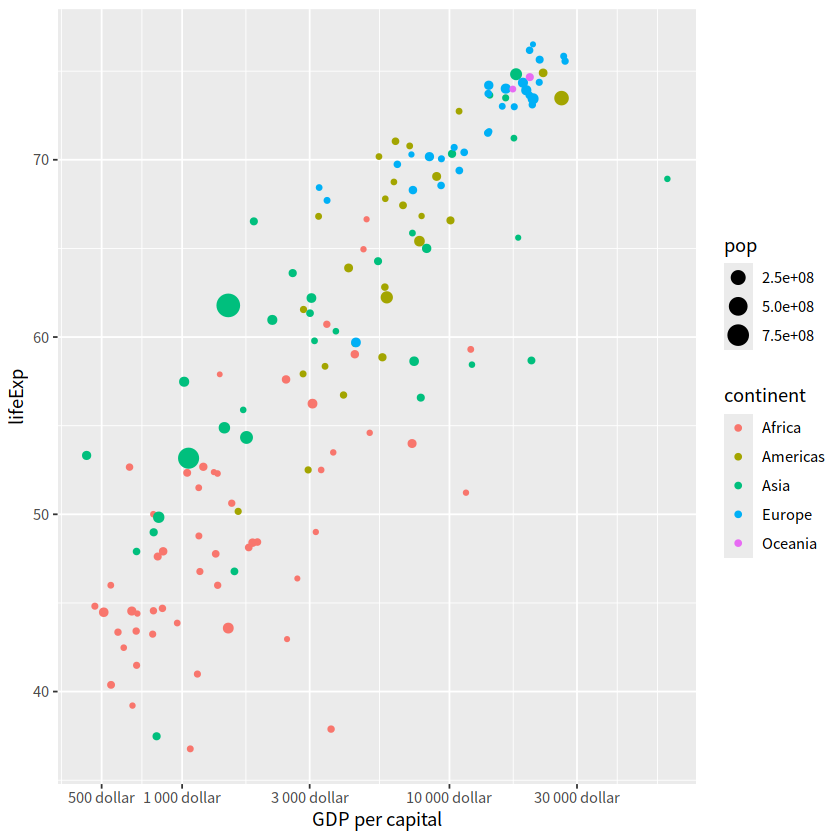

In [12]:
newgapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
    geom_point(aes(color = continent, size = pop))+
    scale_x_log10(name = "GDP per capital",
                  breaks = c(500, 1000, 3000, 10000, 30000),
                  labels = scales::unit_format(unit = "dollar"))

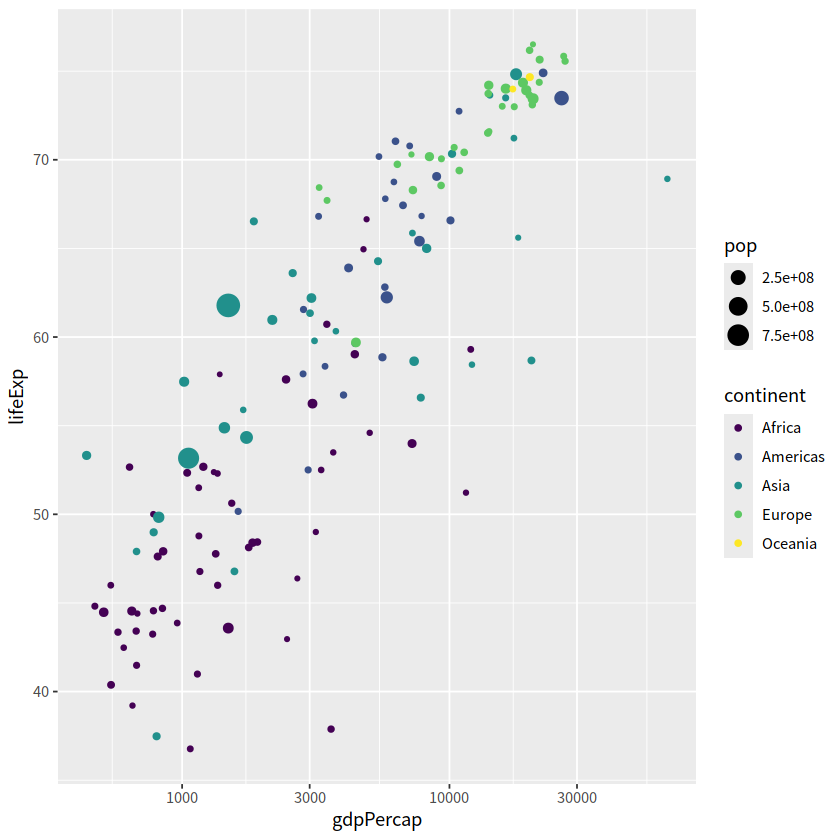

In [13]:
newgapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
    geom_point(aes(color = continent, size = pop))+
    scale_x_log10()+
    scale_color_viridis_d()

离散变量映射到色彩的情形，可以使用`ColorBrewer`色彩。

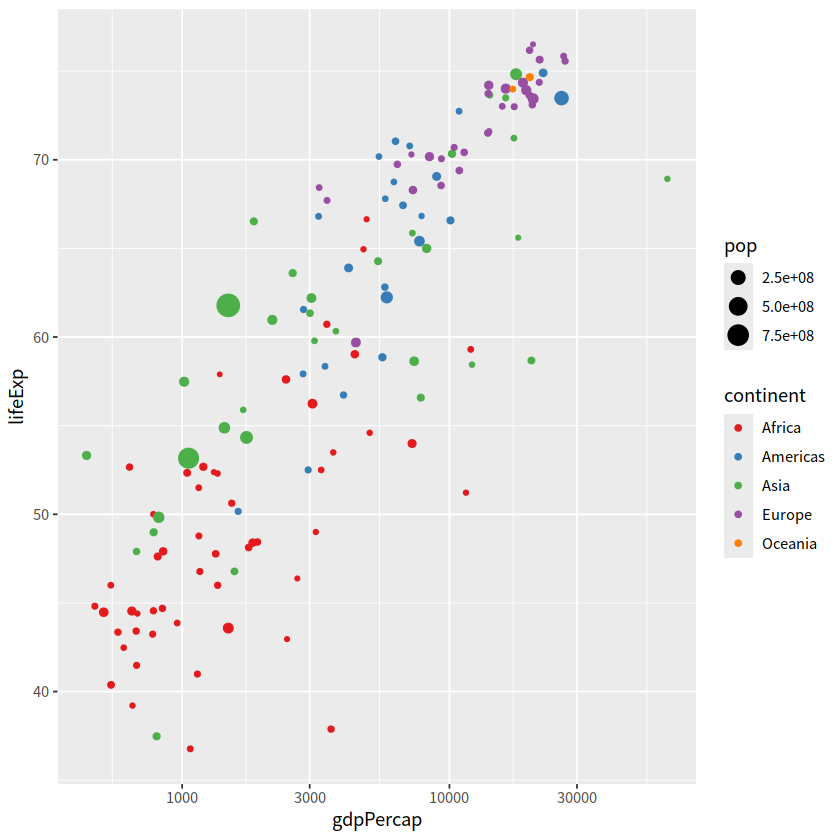

In [14]:
newgapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
    geom_point(aes(color = continent, size = pop))+
    scale_x_log10()+
    scale_color_brewer(type = "qual", palette = "Set1")

当然，颜色和大小这些也可通过自定义

`scale_color_manual`

`scale_size`

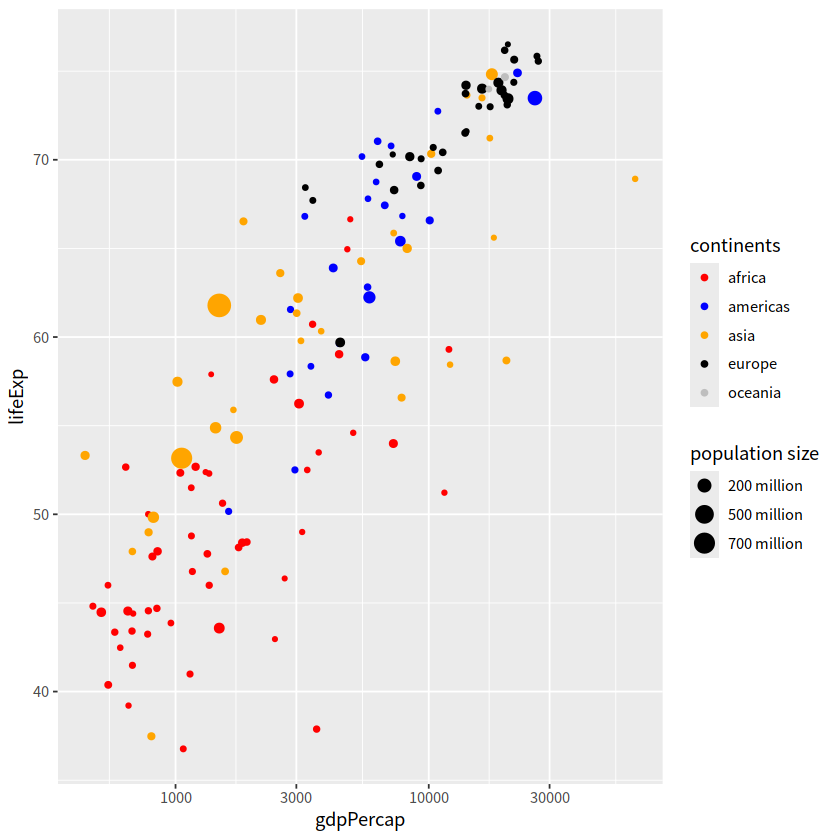

In [15]:
newgapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(color = continent, size = pop)) +
    scale_x_log10() +
    scale_color_manual(name = "continents",
                       values = c("Africa" = "red", "Americas" = "blue", "Asia" = "orange",
                                  "Europe" = "black", "Oceania" = "gray"),
                       breaks = c("Africa", "Americas", "Asia", "Europe", "Oceania"),
                       labels = c("africa", "americas", "asia", "europe", "oceania")
                      )+
    scale_size(name = "population size",
               breaks = c(2e8, 5e8, 7e8),
               labels = c("200 million", "500 million", "700 million"))

**那什么时候用标度，什么时候用主题？**

**这里有个原则：主题风格不会增加标签，也不会改变变量的范围，主题只会改变字体、大小、颜色等等。**